In [ ]:
# NS_citation_rewiring
import networkx as nx
import tqdm as tqdm

## PreProcessing and making of Graph

In [ ]:
# http://networkrepository.com/proximity.php
# f = open("/content/drive/MyDrive/NSProjectDataset/citationData/CA-HepPh.txt", "r")
f = open("/content/drive/MyDrive/NSProjectDataset/citationData/Cit-HepPh1_large.txt", "r")
# tag1
# f = open("C:\\Users\\abhishek\\Desktop\\iiitdabhi\\4rthSem\\NS\\ash1\\directed\\email-Eu-core.txt", "r")
edges=f.read().split("\n")
node1_List=[]
node2_List=[]

for ed in edges:
#     print(ed,ed.split())
#     break
#     print(eds)
    eds=ed.split()
    if(len(eds)!=0):
        n1=int(eds[0])
        n2=int(eds[1])
#     print(eds,eds[0],eds[1])
#     break
        node1_List.append(n1)
        node2_List.append(n2)
G=nx.Graph()

for edge in range(len(node1_List)):
    node1=node1_List[edge]
    node2=node2_List[edge]
    G.add_edge(node1,node2)
Degree_count_from={}
Degree_count_to={}
Degree_from={}
Degree_to={}
node1_List_set=set(node1_List)
node2_List_set=set(node2_List)

for x in node1_List_set:
  # if(x not in Degree_count_from):
      Degree_from[x]=G.degree(x)
  # else:
  #   print("hi")
  #   break

for y in node2_List_set:
  # if(x not in Degree_count_to):
      Degree_to[y]=G.degree(y)
  # else:
  #   print("hello")
  #   break


In [ ]:
num_edges=len(node2_List)

In [ ]:
## 

## Rewiring Logic

In [ ]:
from random import randrange
Gr=G.copy()   
for i in range(num_edges):
    rndnum=randrange(num_edges)
    if(rndnum!=i and node1_List[i]!=node2_List[rndnum] and Gr.has_edge(node1_List[i],node2_List[i])):
      Gr.remove_edge(node1_List[i],node2_List[i])
      Gr.add_edge(node1_List[i],node2_List[rndnum])




## Robustness for Rewired Citation Graph

In [ ]:
G1=Gr.copy()
nodes_in_Graph=list(G1.nodes())
size_of_lrgest_cnctd_cmpnt=[]
percent_of_remaining_nodes=[]
orignal_graph_no_of_nodes=len(nodes_in_Graph)
# for x in tqdm.tqdm(nodes_in_Graph):
i=0
pbar = tqdm.tqdm(total=orignal_graph_no_of_nodes)
while (i < orignal_graph_no_of_nodes): 
  largest_cc = max(nx.connected_components(G1), key=len)
  percent_of_rnodes=round(len(G1.nodes())/orignal_graph_no_of_nodes,5)
  size_of_lrgest_cnctd_cmpnt.append(len(largest_cc))
  percent_of_remaining_nodes.append(percent_of_rnodes)
  # print(len(largest_cc),percent_of_rnodes)
  # G1.remove_node(x)
  G1.remove_nodes_from(nodes_in_Graph[i:i+10])
  pbar.update(10)
  i+=10

  # print(len(G1.nodes()))

No handles with labels found to put in legend.


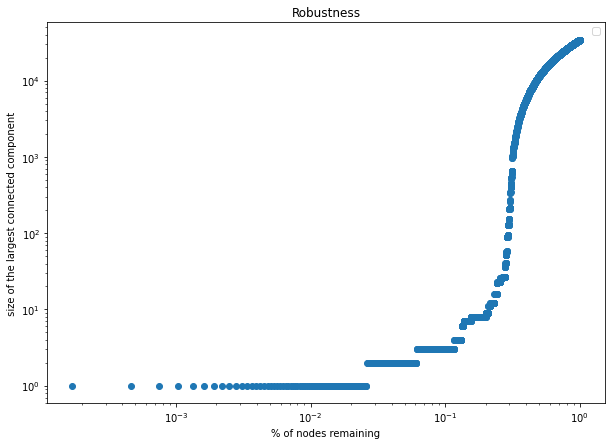

In [ ]:


x_axis=percent_of_remaining_nodes
y_axis=size_of_lrgest_cnctd_cmpnt

import matplotlib.pyplot as plt 
import matplotlib
# plt.scatter(x_axis, y_axis, label = "fraction") 
plt.loglog(x_axis, y_axis,"o") 
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel('% of nodes remaining') 

plt.ylabel(' size of the largest connected component ') 
 
plt.title('Robustness') 
plt.legend() 
# plt.show() 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 7)